# Imports

In [361]:
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
np.random.seed(0)

# Data

In [362]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [363]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualization

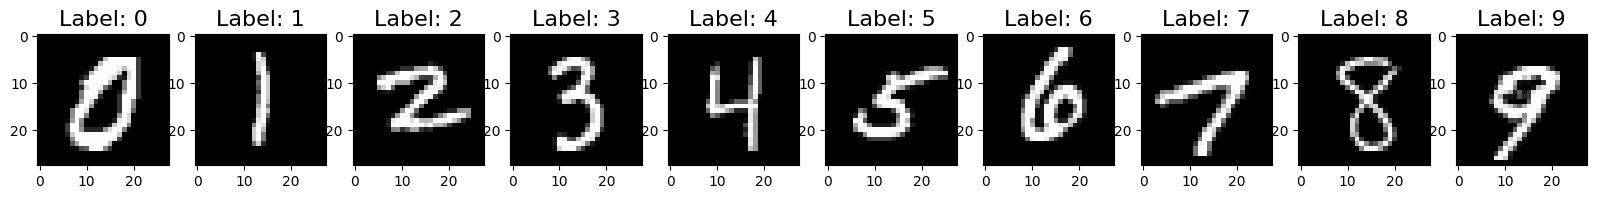

In [364]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
    sample = x_train[y_train == i][10]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label: {}".format(i), fontsize = 16)

In [365]:
for i in range (num_classes):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [366]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [367]:
for i in range (num_classes):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Data Preparation

In [368]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [369]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print(x_train.shape)

(60000, 784)


# Model Creation: Fully Connected Neural Network

In [372]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784, ), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [373]:
batch_size = 512
epochs = 10
history = model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6908 - loss: 1.0585 - val_accuracy: 0.9313 - val_loss: 0.2295
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9290 - loss: 0.2419 - val_accuracy: 0.9525 - val_loss: 0.1583
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9500 - loss: 0.1679 - val_accuracy: 0.9621 - val_loss: 0.1269
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9601 - loss: 0.1392 - val_accuracy: 0.9652 - val_loss: 0.1112
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9687 - loss: 0.1089 - val_accuracy: 0.9699 - val_loss: 0.0961
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9717 - loss: 0.0954 - val_accuracy: 0.9723 - val_loss: 0.0871
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9757 - loss: 0.0798 - val_accuracy: 0.9742 - val_loss: 0.0806
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9770 - loss: 0.0739 - val_accuracy: 0.

In [374]:
model.save("mnist_model.h5")

# Evaluation

In [375]:
from keras.models import load_model
model = load_model("mnist_model.h5")

In [376]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0853
Test Loss: 0.07307025790214539, Test Accuracy: 0.9760000109672546


In [377]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
[[5.1494948e-07 2.4972985e-07 1.5970302e-04 ... 9.9940360e-01
  2.7760600e-06 1.2640771e-05]
 [1.1221642e-07 4.7048373e-04 9.9927706e-01 ... 4.8803173e-08
  2.4767212e-05 1.9046302e-09]
 [1.7800841e-05 9.9745041e-01 6.2401709e-04 ... 7.9674349e-04
  2.6946340e-04 1.8453315e-05]
 ...
 [3.8002815e-10 7.4961628e-09 8.7476783e-11 ... 5.0997221e-07
  4.8338284e-06 4.9726291e-06]
 [1.3252921e-08 9.0225903e-08 1.0347517e-09 ... 1.3306847e-08
  2.7880011e-05 8.3540136e-10]
 [1.9266161e-05 8.0260198e-09 8.8757176e-08 ... 7.2497047e-12
  1.6971811e-08 2.1738800e-09]]
[7 2 1 ... 4 5 6]


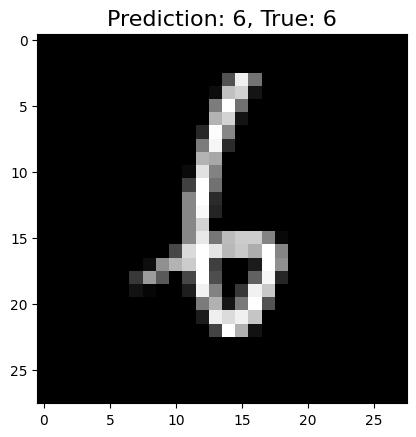

In [378]:
#Sample Testing
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Prediction: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')

# Confusion Matrix

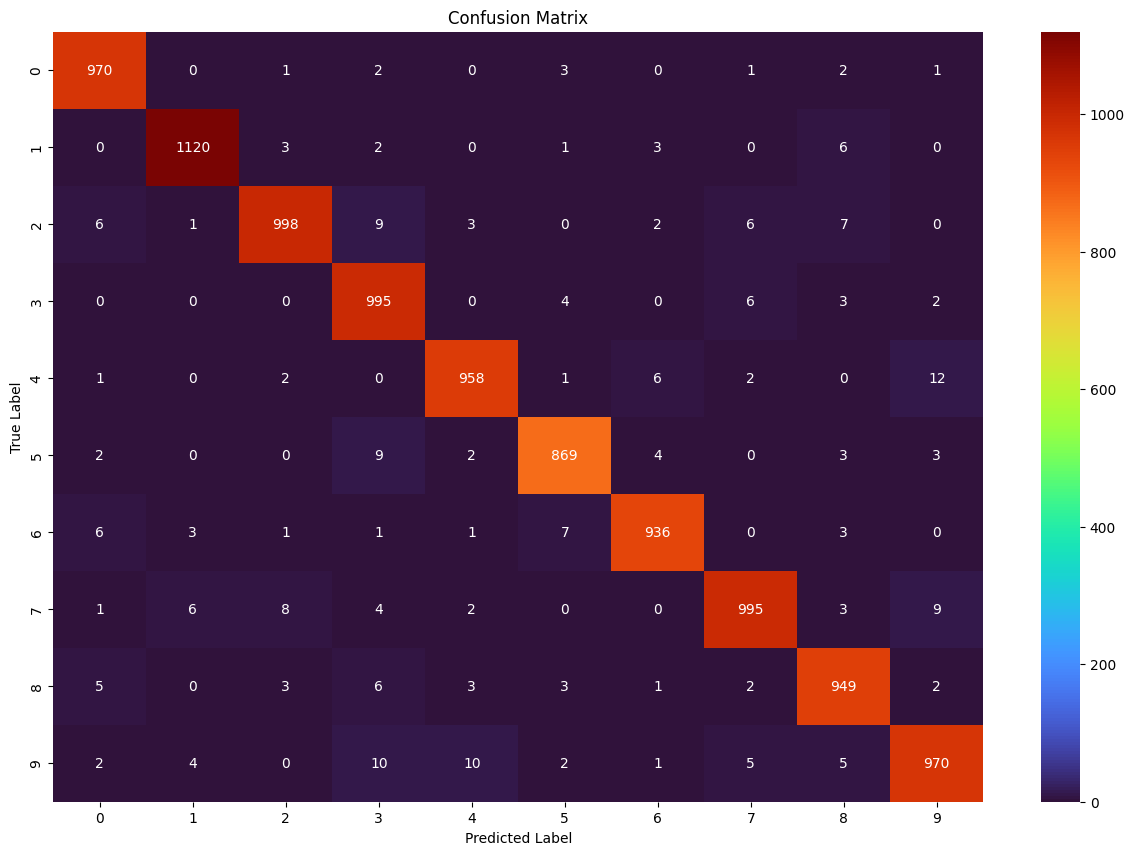

In [379]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = "turbo")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investagion of Errors

In [380]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [381]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-10:]

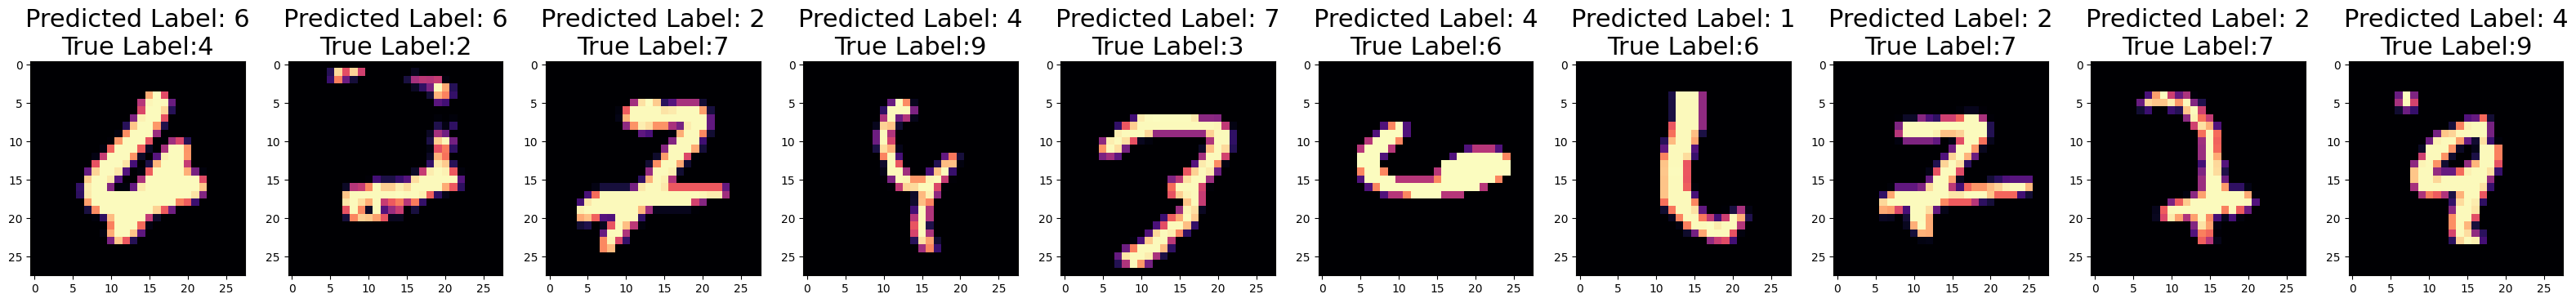

In [382]:
# Showing top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize = (40,40))

for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28, 28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap = 'magma')
    ax[i].set_title("Predicted Label: {}\nTrue Label:{}".format(y_p, y_t), fontsize = 22)

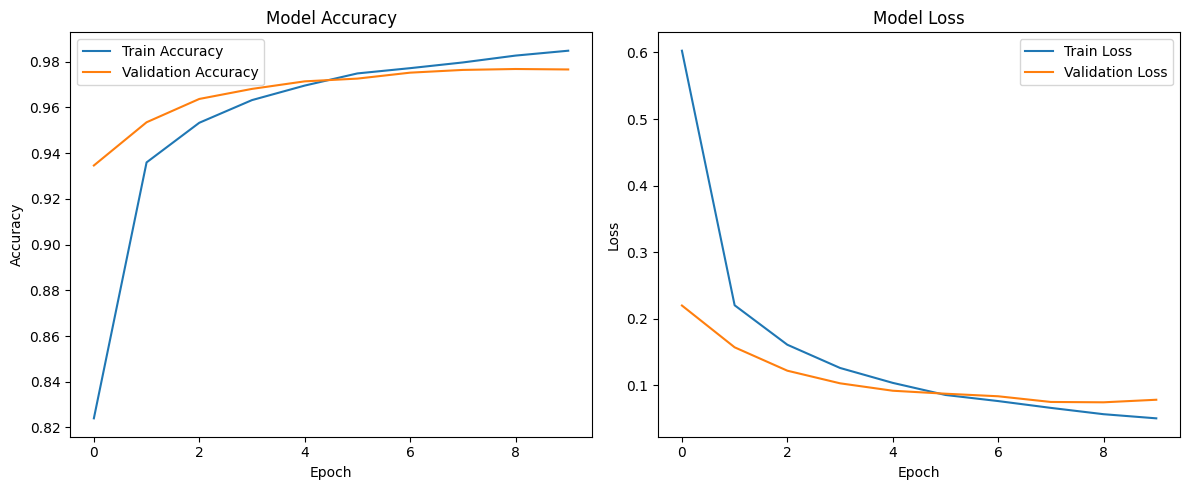

In [319]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


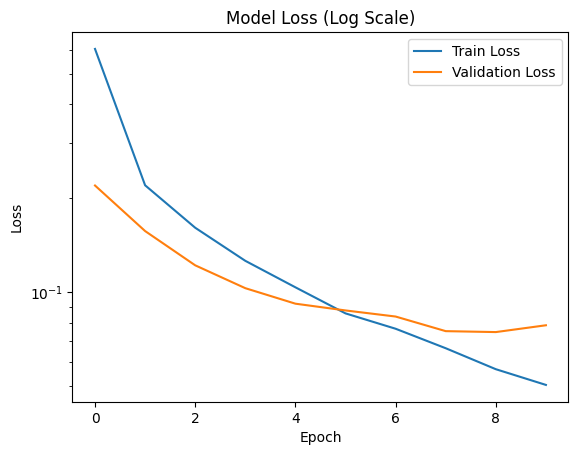

In [320]:
# Log Scale
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.yscale('log')  # <- log scale for Y-axis
plt.title('Model Loss (Log Scale)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


